# Introduction to Metaheuristics

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/main/lectures/04_01_intro_metaheuristics.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Professors:
* Glauco Gonçalves
* Jasmine Araújo

## History Overview


* Metaheuristics as a method to optimization is a modern phenomenon, though <u>it is difficult to pinpoint when a metaheuristic method was first used</u>
* 1960s - 1970s: John Holland and his collaborators developed genetic algorithms (GAs), summarizing its contribution in its 1975's book <u>Adaptation in Natural & Artificial Systems</u> ([Link to 1992's edition](https://amzn.to/3YFwy6J)).
* 1975: Kenneth [De Jong finished his PhD thesis](https://deepblue.lib.umich.edu/handle/2027.42/4507) showing the potential and power of GAs for a wide range of objective functions, noisy, multimodal, or even discontinuous
  * In essence, a GA is a <u>search method</u> based on the abstraction of natural selection and representing them in the mathematical operators: crossover or recombination, mutation, fitness, and selection of the fittest.
  * GAs have become very successful in solving a wide range of optimization problems, and several thousand research papers and books have been written on this subject.
* 1980s and 1990s: several nature-inspired optimization strategies were developed
  * Simulated annealing (SA) was [proposed by Kirkpatrick, Gellat, and Vecchi](https://www.science.org/doi/10.1126/science.220.4598.671) in 1983, inspired by the annealing process of metals
  * [Tabu search was published in 1997](https://link.springer.com/book/10.1007/978-1-4615-6089-0), despite it was developed probably in 1986.
  * 1992: Marco Dorigo described ant colony optimization (ACO), inspired by the swarm intelligence of ants.
  * 1995: [Particle Swarm Optimization (PSO) was proposed by Kennedy and Eberhart](https://www.cs.tufts.edu/comp/150GA/homeworks/hw3/_reading6%201995%20particle%20swarming.pdf), inspired by swarm intelligence of fish, birds, and humans.
  * Publication of [No Free Lunch Theorems for Optimization](https://www.cs.ubc.ca/~hutter/earg/papers07/00585893.pdf) by Wolpert and Macready in 1997.
    * States that if algorithm A performs better than algorithm B for some optimization functions, then B will outperform A for other functions, i.e., if averaged over all possible function space, both will perform, on average, equally well. 
    * <u>Conclusion: No universally better algorithm exist</u> 
    * The research now focus on finding the best and most efficient algorithm(s) for a given set of problems
* 2000 and so on:
  * 2004, Honeybee algorithm by Nakrani and Tovey
  * 2005, Artificial bee colony by Karaboga
  * 2008, Firefly algorithm by Xin-She Yang
  * 2009, Cuckoo search by Xin-She Yang and S. Deb
  * 2010, Bat algorithm by Xin-She Yang 
  * 2012, Flower pollination algorithm by Xin-She Yang
  * 2015, Ant Lion Optimizer by Seyedali Mirjalili
  * 2016, Crow search algorithm by Alireza Askarzadeh
  * 2019, Harris’ Hawks optimization by Heidari et al.
  * 2021, Jellyfish search by Chou and Truong
  * 2024, [African Vultures Optimization](https://link.springer.com/article/10.1007/s10462-024-10981-2) by Hussien et al.
* A recent survey: [(Kumar, Nadeem, and Banka, 2022)](https://link.springer.com/article/10.1007/s12530-022-09432-6)

## Basic Concepts

* Heuristics, from greek *Heuriskein* that means to discover
  * "Heuristics are efficient cognitive processes [...] that ignore part of the information" [(Gigerenzer & Gaissmaier, 2011)](https://www.researchgate.net/publication/49653132_Heuristic_Decision_Making)
  * It is expected that in many cases heuristics will achieve optimal values ​​for solving NP-Hard problems, but there are no guarantees
  * In the other hand, a heuristic has a reasonable computational cost
* "Metaheuristics are high level strategies for exploring search spaces by using different methods" [(Blum & Roli, 2003)](https://www.iiia.csic.es/~christian.blum/downloads/blum_roli_2003.pdf)
  * A Metaheuristic is a framework that, from a common approach, serves as the basis for designing heuristics for a wide range of optimization problems with little to no modifications.
  * Metaheuristics excel on several problems as non-convex programming or integer programming

### Metaheuristics Notions

The main common notion behind all metaheuristics is seeing **the optimization problem as a search problem**. This is not a new concept. It is the very notion behind Gradient Descent or Hill Climbing, i.e, starting from an initial guess solution, the algorithm chooses a neighbor solutions using some clever strategy (the gradient or a direction of improvement) and chooses it as the new solution. Thus, the solution is improved iteratively at each step.

However, there are other ways to search. Let's imagine a treasure hunt on an island:
 * We can search the treasure without any guidance, in a **pure random search**, **but it is not efficient**. 
 * We can search **every square meter of the island** to find out the lost treasure, but it is less efficient yet.
 * If we know that the treasure is in the highest peak, **we would use our current location and landscape view** to reach the highest peak (like a gradient), but **this information is not always available**.

<img src="./figures/treasure-map-153425_1280.png" alt="drawing" width="400"/>

In general, we <u>are not blindfolded</u> but, at the same time, we do not know where to look. So, the most likely scenario is that we take a random walk, looking for some guess of where to go, and then the next plausible position is checked, and so on. **Metaheuristics looks for a tradeoff between random walks and local search**.

You can do this treasure hunt **alone** (trajectory-based search) or with **a group of people** exchanging information with each other (swarm intelligence). You can even increase the efficiency of the group by evaluating the individual competence of each hunter and following only the best hunters.

Please note that, if there is no time limit and all regions are accessible, then it is theoretically possible to find the treasure (the global optimum). But, in practice, the island is large, and the search process could stop at some point in time without the treasury. In this case, the process finishes with a good guess of the treasury location (a local optimum).

#### Exploration and Exploitation

**Exploration** (a.k.a. diversification $^{[1]}$ ) means generating diverse solutions by exploring the search space globally. This is achieved by random walks and other strategies of a Metaheuristics and it gives the main advantages of <u>escaping from bad areas</u> and <u>finding new good areas</u>.

**Explotation** (a.k.a. intensification) means focusing the search on a local region by exploring the information of a good current solution found in this region. This is the local search component of a Metaheuristics and it gives the advantage of <u>improving solutions towards optimum</u>.

In short, exploiting towards the best solutions guarantees that the algorithm will converge to optimal solutions, while exploring via randomness prevents solutions from falling into a local optimum, while increasing the diversity of solutions.

[1] Despite authors like [(Blum & Roli, 2003)](https://www.iiia.csic.es/~christian.blum/downloads/blum_roli_2003.pdf) distinguish the terms exploration and diversification (and similarly they distinguish explotation and intensification), in this lecture we treat both as synonyms.

#### Encoding

Encoding is the process of representing a solution of the problem to a specifc form. Depending upon the domain of the <u>decision variables</u>, a solution could be encoded in several forms. The table below (adapted from [(Kumar, Nadeem, and Banka, 2022)](https://link.springer.com/article/10.1007/s12530-022-09432-6)) shows commonly used encodings.

|**Encoding**|**Example**|**Remarks**|
|---|---|---|
|Binary string|10010|For binary decision variables|
|Tuple of integers|(34,70)|For integer decision variables, each number is a variable|
|Tuple of real values|(5.78,0.223,9.01)|Each individual number is a continuous decision variable|
|Ordered set of integers|(7,4,9)|A short alternative representation for paths in a graph, in this example the path is $V_7 \rightarrow V_4 \rightarrow V_9$|
|2D Matrix|$\begin{pmatrix}  1 & 0 & 2 & 1\\ 2 & 1 & 1 & 0 \\  2 & 0 & 1 & 1  \end{pmatrix}$|A short representation of a schedule, e.g., columns may represent tasks and rows workers, the numbers may represent the time in hours for each task|



#### Solution Generation


There are two main strategies for solution generation:
* **Randomness**
  * This is the strategy chosen at the initial stage of the Metaheuristics, with the goal of spreading out solutions across the search space
  * However, this can be used further in the algorithm for increasing its exploration capabilities
* **Algorithmic operators**
  * These are a set of strategies to update solutions in order to obtain better solutions
  * They can be used at each iteration of the metaheuristics
* **Both strategies can used together**: Algorithmic operators operators are, in general, deterministic strategies, but it can admit some randomness
* Please note that for <u>constrained optimization problems</u>, the solution generation strategy must also ensure that solutions are feasible

#### Elitism

Metaheuristics tend to preserve high-quality solutions, preventing they are lost over iterations. This process is called elitism and it guarantees that the quality of the solution is improved as iterations proceed.

#### Stopping criteria

Since a Metaheuristics is searching for an optimal unknown solution of a problem, it does not knows if the best solution found, at a certain iteration, is the global optimum. Thus, the Metaheuristics must have a stopping criteria. There are some strategies:
* Exhaustion-based criteria
  * Maximum number of iterations 
  * Maximum number of objective function evaluations
  * Maximum CPU time
* Error-based criteria
  * When the global optimum is already known, one can use the error between the best generated solution and the optimum to stop the algorithm
optimum.
  * Amount of change in best solution
  * A tolerance limit on the relative error of the previous best solution and the current best solution found
    * If the error is less than a tolerance for a given number of generations or given amount of time, the algorithm stops
  * The tolerance can be used also considering the population 
    * The algorithm stops when the "movement" of decision variables is marginal

#### Fitness function

In order to find optimal solutions, a metaheuristics must check how good or bad a solution is, as soon it is found. In the metaheuristics research area jargoon, the function used to evaluate solutions is called the fitness function, and it helps the algorithm choosing which solutions should be taken to the next iteration or which ones to choose for applying the algorithmic operator.

Considering a formal optimization problem, the fitness function is very associated to the objective function of the problem and, for unconstrained mathematically and well-defined problems, <u>the fitness function is just an implementation of the objective function of the optimization problem</u>. 

However, for constrained optimization problems, the algorithm can consider the constraints as part of the fitness function. This technique is described by [(DOBNIKAR et al, 1999)](https://web.archive.org/web/20051205012724id_/http://vision.ucsd.edu:80/~sagarwal/icannga.pdf) and it consists in <u>to check the feasability first</u>, i.e., the technique checks constraints first and computes the objective function only when the solution is feasible.

In order to understand this technique, please consider a constrained optimizaiton problem like:

$
\min f(\mathbf{x}) \\
\text{s.t.} \\
g_j(\mathbf{x}) \geq 0, \, \forall j \in J
$

Using the <u>feasability first</u> technique, the fitness function would be

$F(\mathbf{x}) = \begin{cases}
f(\mathbf{x}) & \text{if } g_j(\mathbf{x}) \geq 0, \forall j \in J \\
f_{max} + \sum_{j=1}^J \langle g_j(\mathbf{x}) \rangle & \text{outros casos}
\end{cases}$

where $f_{max}$ is the maximum value of $f(.)$ considering just the current feasible solutions; and $\langle . \rangle$ is an operation that gives the absolute value of the operand, if it is negative, and returns zero in other cases. 

Since we have to minimize the function, $f_{max}$ will be the objective function value of the current worst feasible solution, and the penalty applied to the unfeasible solution makes it still worst. 

Please note that this is not the only technique for coping with constraints in metaheuristics, but such a technique is covered here since it shows that a fitness function can consider other aspects than the objective function. Its main advantage is to avoid computing the objective function when the solution is unfeasible, which is important to consider when there is a high cost to compute the objective function $f(\mathbf{x})$.

A high cost objective function can occurs also in unconstrained problems, these functions have, in general, no clear mathematical definition. Examples are the cases when the quality of a solution is given by the result of a simulation model or a machine learning model. In these cases, the value of the fitness function for a particular solution can be obtained just by the execution of the model.

### Metaheuristics Structure

The following flowchart (from [(Kumar, Nadeem, and Banka, 2022)](https://link.springer.com/article/10.1007/s12530-022-09432-6)) shows a set of steps common to all metaheuristics.

The first step in the algorithm is to set its parameters, which is made by the operator the algorithm and whose values and meaning depend on each specific algorithm. There is no general strategy to follow in this step, and the choice of the parameters is guided by the experience of the operator and some testing.

The second step is the very first made by the algorithm itself. The algorithm generate a solution to start the process. In case the algorithm is trajectory-based just one solution is generated, but if it uses some form of swarm intelligence it will generate a set of solutions, also called a **population**. In general, this step follows a stochastic approach in order to increase algorithm's exploration capabilities.

At the third step, using the fitness function, each generated solution is evaluated. For populations, the evaluation can occur sequentially or in parallel, if it is possible. The usage of parallelism is very important to speed up metaheuristics since, as the population size can have hundreds or thousands solution, much time is taken computing the fitness function of each solution.

In the fourth step the algorithm employs a mix of exploitation and exploration techniques to generate new solutions. This is the step that mainly distinguishes the metaheuristics from one anotther, since the  operators employed here are built to mimic the natural processes in which the metaheuristics is inspired. But, in general, these operators will work locally improving the current solutions, with emphasis on the best ones, or randomly changing some solutions to move them for new exploring areas.

The fifth step is like the third one, but here just new solutions will be evaluated. After that, at the sixth step, following the concept of elitism, the list of solutions will be updated, and the best ones can optionally be saved (seventh step) separatelly to be used as part of the operators in next iteration.

Finally, the stopping criteria is verified, and if not met, the algorithm continues from the third step on. When the stopping criteria is reached, the best solution from the population is chosen.

<img src="./figures/generic-metaheuristics.png" alt="drawing" width="400"/>

## Classification of Metaheuristics

Today there is a huge number of metaheuristics. The [pyMetaheuristic](https://github.com/Valdecy/pyMetaheuristic) library implements an impressive number of 53 algorithms! But there must be much more. 

Focusing only on the Nature Inspired Optimization Algorithms (NIOA), [(Kumar, Nadeem, and Banka, 2022)](https://link.springer.com/article/10.1007/s12530-022-09432-6) review 29 metaheuristics: 
* Artifcial Bee Colony (ABC) 
* Ant Colony Optimization (ACO) 
* Bat Algorithm (BA) 
* Biogeography Based Optimization (BBO) 
* Bacterial Foraging Optimization (BFO) 
* Central Force Optimization (CFO)
* Clonal Selection Algorithm (CLSA) 
* Chemical Reaction Optimization (CRO) 
* Cuckoo Search Algorithm (CSA) 
* Diferential Evolution (DE) 
* Dolphin Pod Optimization (DPO)
* Electromagnetism Optimization (EMO) 
* Firefy Algorithm (FA) 
* Flower Pollination Algorithm (FPA) 
* Genetic Algorithm (GA)
* Gravitational Search Algorithm (GSA)
* Harmony Search (HS)
* Krill Herd Algorithm (KHA)
* Lion Optimization Algorithm (LOA)
* Monkey Search Algorithm (MSA)
* Optics Inspired Optimization (OIO)
* Paddy Field Algorithm (PFA)
* Particle Swarm Optimization (PSO)
* River Formation Dynamics (RFD)
* Simulated Annealing (SA)
* Shufed Frog Leaping Algorithm (SFLA)
* Spiral Optimization Algorithm (SOA)
* Social Spider Optimization (SSO)
* Tabu Search (TS)

An interesting result from this survey is the classification provided by the authors. They classify the NIOA by three criteria: **source of inspiration**, **number of solutions**, and **nature of the algorithm**. 

* The source of inspiration indicates if the algorithm is inspired in a biological process (most algorithms are in this category), a purely physical process or other strategy (there is one reviwed metaheuristc based on chemical processes and other in music).
* The number of solutions indicates with a NIOA is trajectory-based (optimizes a single solution) or swarm intelligence-based (optimizes a population).
* Finally, the nature of the algorithm indicates if it uses some sort of randomness (about all NIOAs falls in this category) or if they are purely deterministic.

The table below shows how each Algorithm can be classified.

<img src="./figures/nioa-table.png" alt="drawing" width="1000"/>

## Random Walks and Optimization

As the table above shows, randomness is a component of most metaheuristics. But, what are the main probability distributions and stochastic processes used to introduce randomness in metaheuristics? In other words, we want to understand what are the best stochastic strategies to improve exploration and exploitation.

### Random Variables

Metaheuristics are implemented in common programming languages and randomization is usually realized by using pseudorandom numbers generated from specific random variables, which follows common probability distributions like uniform distribution, Gaussian distribution, Exponential distribution and so on. 

> A random variable is a function that assigns a real number to each outcome in the **sample space** of a random experiment. In other words, random variables are numerical variables to which we associate probabilities.

Random variables can be **continuous** (real-valued variables) or **discrete** (includes only some specific values ​​from \mathbb{R}$). If a random variable can have both continuous and discrete values, it is called a **mixed type**. 

Each random variable has a **probability density function**, that express how probability distributes over its **support**. 

> The number of phone calls per minute obey the Poisson distribution. This is a discrete random variable whose support is $\mathbb{N}$ (0,1,2...) and its probability density function is given by $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$, where $\lambda \gt 0$ is the average number of calls per minute.

> The blood pressure of a person follows the Normal (or Gaussian) distribution. This a popular continous random variable whose support is $\mathbb{R}$ and its probability density function is $f(x) = {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$, where $\mu$ is the mean and $\sigma$ is the standard deviation.

The special case when $\mu = 0$ and $\sigma = 1$ is the **standard normal distribution**, denoted by $\mathcal{N}(0,1)$.

### The Stable distribution

In the context of metaheuristics there is a <u>distribution family</u> used for continous random number generation that is called **Lévy alpha-stable distribution**, or just, Stable distribution. This distribution family has the following property:

> Let $X_1$ and $X_2$ be independent realizations of a random variable $X$. Then $X$ is said to be **stable** if for any constants $a \gt 0$ and $b \gt 0$ the random variable $aX_1 + bX_2$ has the same distribution as $cX + d$ for some constants $c \gt 0$ and $d \in \mathbb{R}$. In other words, if two independent random variables follows a stable distribution, any linear combination of these variables follows the same distribution.

Please note that the normal distribution follows this property (summing two gaussians gives us a gaussian variable). Actually, we say that the normal distribution pertains to this distribution family, as we show below.

The probability density function of this distribution does not have a closed-form, except for some specific parameter values, so differently of conventional distributions, the Stable distribution is defined by its **Characteristic Function**.

The characteristic function $\varphi(t)$ of any probability distribution is the <u>Fourier transform of its probability density function</u> $f(x)$:

${\displaystyle \varphi (t)=\int _{-\infty }^{\infty }f(x)e^{ixt}\,dx}$

So the characteristic function of the stable distribution can be written as

${\displaystyle \varphi (t;\alpha ,\beta ,c,\mu )=\exp \left(it\mu -|\alpha t|^{\beta }\left(1-ic \operatorname {sgn}(t)\Phi \right)\right)}$

where $sgn(t)$ is just the sign of $t$ and

${\displaystyle \Phi ={\begin{cases}\tan \left({\frac {\pi \beta }{2}}\right)&\beta \neq 1\\-{\frac {2}{\pi }}\log |t|&\beta =1\end{cases}}}$.

Also, 
* $\mu \in \mathbb{R}$ is a location parameter (moves the distribution mean)
* ${\displaystyle c \in [-1,1]}$ is a measure of asymmetry
* $\alpha \gt 0$ is a scale factor which is a measure of the width of the density function
* ${\displaystyle \beta} \in ]0;2]$ specifies the asymptotic behavior of the distribution

Whereas there is no closed-form solution for $f(x)$, there are three specific cases: 

* For ${\displaystyle \beta =2}$ the distribution is a normal distribution with variance $\sigma^2 = 2\alpha^2$ and mean $\mu$; $c$ has no effect in this case
* For ${\displaystyle \beta =1}$ and ${\displaystyle c=0}$ the distribution reduces to a Cauchy distribution with scale parameter $\alpha$ and shift parameter $\mu$.
* For ${\displaystyle \beta =1/2}$ and ${\displaystyle c=1}$ the distribution reduces to a Lévy distribution with scale parameter $\alpha$ and shift parameter $\mu$.

These special cases are interesting since, with the exception of the normal distribution ($\beta =2$), the two other distributions have an interesting property: they are **heavy-tailed distributions**. 

In probability theory, heavy-tailed distributions are probability distributions whose tails are not exponentially bounded, i.e., the probability of extreme values are much higher than the probability obtained from the exponential distribution. In short, in heavy-tailed distributions the probability of extreme values is not negligible.

This shows, in one hand, the versatility of stable distribution family for controlling how much heavy-tailnedness we want in the random number generation and, in the other hand, the simplicity to make this control (through $\beta$ parameter).

### Random Walks and Lévy Flights

A random walk is a random process that consists of taking a series of consecutive random steps. Mathematically speaking, let $S_N$ denote the sum of each consecutive
**independent** random steps $X_i$ drawn from a random variable; then $S_N = \sum_{1}^N X_i$ is a random walk. Recursively, the random walk can be written as $S_N = S_{N-1} + X_N$. So, the next state $S_N$ only depends on the current existing state $S_{N−1}$ and the step $X_N$. <u>This is equivalent the memoryless property of a Markov chain</u>.

The random walk can be think as the movement of a particle in a open space. This movement is random and follows a certain random variable. Thus, for a particle starting with an initial location $x_0$, its final location $x_N$ after $N$ time steps is $x_N = x_0 + \sum_{i=1}^N s_i$, where $s_i$ is drawn from $X_i$.

If the step length obeys the normal distribution ($X_i \sim \mathcal{N}(\mu_i,\sigma_i)$), the random walk becomes a Gaussian Random Walk, also called Brownian Motion. Since the <u>normal distribution is stable</u>, $\sum_{i=1}^N s_i \sim \mathcal{N}(\mu_*,\sigma_*)$, where

$\mu_* = \sum_{i=1}^N \mu_i$ and $\sigma^2_* = \sum_{i=1}^N (\sigma_i^2 + (\mu_* - \mu_i)^2)$

We can see that the variances increases as $N$ increases, which makes possible reaching any areas in the search space if $N$ is large enough. In the special case when $\mu_1 = \mu_2 = \ldots = \mu_N = 0$ (zero mean), $\sigma_1 = \sigma_2 = \ldots = \sigma_N = \sigma$ (constant standard deviation), the above equations become

$\mu_* = 0$ and $\sigma^2_* = N\sigma^2$

This result indicates that, in average, the particle don't moves (its position is the same) but, at the same time, it has a good coverage of the space, which increases as steps advances. 

The code below illustrates such result. It shows the random walk of 100 particles. Starting at 0, each particle is executed 50 steps. The first graph shows the path of each particle, whereas the histogram shows the distribution of the last position of each particle. The last graph shows a histogram of the distribution of the visited positions by all particles. 

Whereas the average last position and the average position is close to zero, the variance increase is significative.

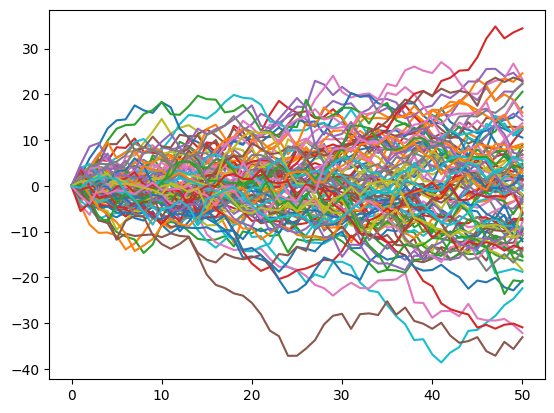

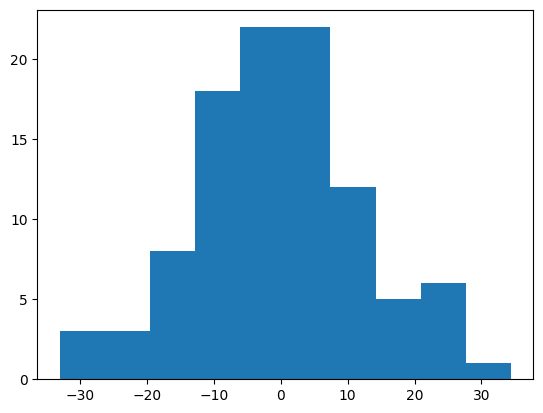

Average Final Positions -0.32571446706946783
Standard Deviation of Final Positions 12.576603949898718


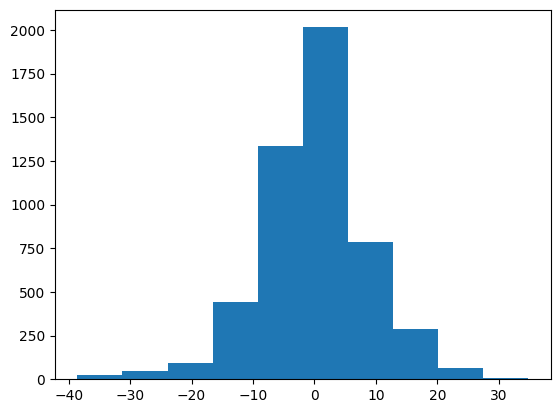

Average All Visited Positions -0.04511206772890635
Standard Deviation of All Visited Positions 8.778325084288348


In [39]:
import random
import matplotlib.pyplot as plt
import numpy as np

N = 50
mu = 0
sigma = 2
trials = 100
finals = []
alldata = []

for t in range(trials):
    xn = 0
    data = [xn]
    for i in range(N):
        xn = xn + random.normalvariate(mu, sigma)
        data.append(xn)
    finals.append(xn)
    alldata.extend(data)
    plt.plot(data)

plt.show()
plt.hist(finals)
plt.show()
print("Average Final Positions", np.average(finals))
print("Standard Deviation of Final Positions", np.std(finals))
plt.hist(alldata)
plt.show()
print("Average All Visited Positions", np.average(alldata))
print("Standard Deviation of All Visited Positions", np.std(alldata))

Despite, the coverage of the search space of the gaussian random walk increases as the time flows, such an increase is linear, i.e., it takes $N$ time steps to increase the variance by $N$. Whereas this cloud be good for small search spaces, a huge search space would take a huge number of steps to be covered, therefore we should investigae other distributions in order to improve this search.

The Stable Distribution is an interesting candidate for using in the random walk due to three main aspects:
1. **It is stable**: as the random walk is a sum of random variables, using this family of distributions guarantees that its properties will be mantained as the random walk goes on.
2. **It can be reduced to gaussian random walk**: the normal distribution is a special case of the Stable Distribution, so if the search space is small, we can adjust the parameters of the distribution and get a gaussian random walk
3. **It generates heavy-tailed distributions**: these distributions are very interesting for reaching distant areas in the search space, since there is a non-negligible probability of generate extremum values, **the random walk could make larger steps, or flights**!

Lévy flights are random walks whose step length is drawn from the Stable Distribution and such processes are more efficient than guassian random walks in exploring unknown, large-scale search spaces.

Below we repeat the previous experiment, but now using Lévy flights. These results point that Lévy flights can reach far distant areas, increasing search space coverage.

Despite its very interesting mathematical properties, [(Yang, Xin-She, 2020)](https://amzn.to/3YOL1gO) cites that Levy Flights have been observed as part of animals' behavior like foraging patterns of albatrosses, fruit flies, and spider monkeys; and physical phenomena, such as the diffusion of fluorescent molecules, cooling, and noise.

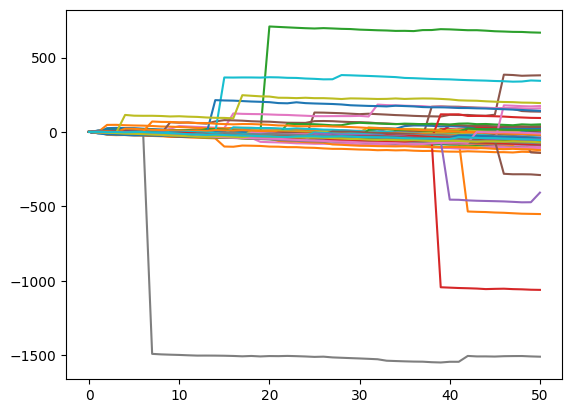

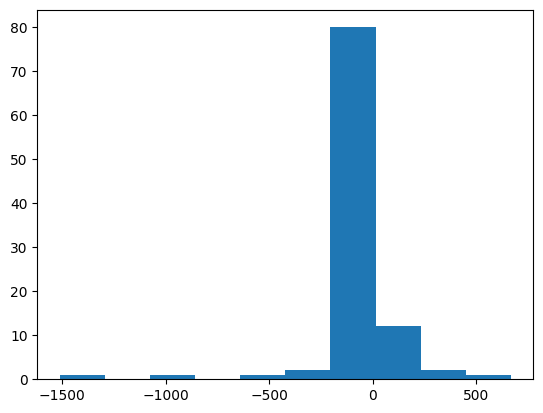

Average Final Positions -59.45367016608878
Standard Deviation of Final Positions 219.25886062423308


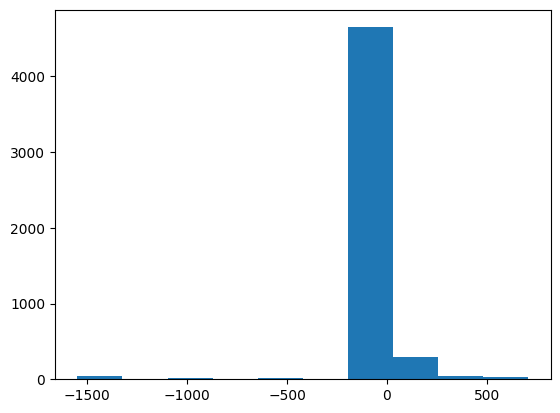

Average All Visited Positions -30.77601992173673
Standard Deviation of All Visited Positions 169.8520562833675


In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

N = 50
beta = 1.2
alfa = 2
trials = 100
finals = []
alldata = []

for t in range(trials):
    xn = 0
    data = [xn]
    for i in range(N):
        xn = xn + st.levy_stable.rvs(beta, alfa, size=1)[0]
        data.append(xn)
    finals.append(xn)
    alldata.extend(data)
    plt.plot(data)

plt.show()
plt.hist(finals)
plt.show()
print("Average Final Positions", np.average(finals))
print("Standard Deviation of Final Positions", np.std(finals))
plt.hist(alldata)
plt.show()
print("Average All Visited Positions", np.average(alldata))
print("Standard Deviation of All Visited Positions", np.std(alldata))

The figure below from [(Lawley, 2023)](https://link.springer.com/article/10.1007/s00332-023-09913-1) compares a bidimensional run of a gaussian random walk (brownian motion) and levy fligths.

<img src="./figures/levy-flights-vs-brownian-motions.png" alt="drawing" width="700"/>

### Mantegna's Algorithm

From the implementation point of view, the generation of multidimensional Lévy flights consists of two steps: 

1. **Generation of a direction**: This should be drawn from a uniform distribution
2. **Generation of steps that obey the Stable Distribution**: This part is wuite trick, and there are a few ways of achieving this. 

One of the most efficient and yet straightforward strategie is the one proposed by [(Mantegna, 1994)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.49.4677). 

In Mantegna’s algorithm, the step length $s$ is given by

$s = \frac{u}{|v|^{1/\beta}}$

where $\beta$ is the parameter that specifies the asymptotic behavior of the Stable Distribution, and $u$ and $v$ are drawn from normal distributions:

$u \sim \mathcal{N}(0,\sigma_u)$, $v \sim \mathcal{N}(0,\sigma_v)$

where

$\sigma_u = (\frac{\Gamma(1+\beta)\sin(\pi\beta/2)}{\Gamma[(1+\beta)/2]\beta2^{(\beta-1)/2}})^{\frac{1}{\beta}}$, $\sigma_v = 1$ 

Please note that $\Gamma(z) = \int _{0}^{\infty} t^{z-1}e^{-t} dt$.

## Optimization as Markov Chains

To solve an optimization problem, we can 
* Perform a random walk starting from a good initial but random-guess solution
* However, simple or blind random walks are not efficient
* For achieving efficiency, we **keep the best solutions** found and increase the mobility of the random walk so as to explore the search space more effectively

We have to find a way <u>to control the walk in such a way that it can move toward the optimal solutions more quickly rather than wander away</u> from the potential
best solutions. This can be done by a **Markov Chain**.

> A random variable $X$ is a Markov process if the transition probability, from state $X_n = x_n$ at time $n$ to another state $X_{n+1} = x$, depends only on the current state $X_n$. That is, $\Pr(X_{n+1}=x\mid X_{1}=x_{1},X_{2}=x_{2},\ldots ,X_{n}=x_{n})=\Pr(X_{n+1}=x\mid X_{n}=x_{n})$. The sequence of random variables $(x_0, x_1 , \ldots , x_n)$ generated by a Markov process is a **Markov chain**. 

One must observe that, the random walk $S_{n+1} = S_{n} + X_n$ has the properties of a Markov chain.

The Markov Chain can be used to create a strategy that, starting from the initial solution (state), proposes a new solution (state) randomly. Then, the move is accepted or not, depending on some probability. The algorithm below, that shows this idea, is the basis of trajectory-based metaheuristics, which will differ according the way the steps 3 and 4 are made. 

---

**Markov Chain Algorithm for Optimization**

$
\text{1. Start with } x_0 \in S \text{, at } t = 0 \\
\text{2. While (stop criterion not met):} \\
    \text{3.} \; \; \; \; \; \; \text{Propose a new solution } y_{t+1} \\
    \text{4.} \; \; \; \; \; \; \text{Generate a random number } 0 \leq P_t \leq 1 \\
    \text{5.} \; \; \; \; \; \; x_{t+1} =
      \begin{cases}
      y_{t+1}  & \text{with probability } P_t \\
      x_{t} & \text{with probability } 1-P_t
      \end{cases} \\ 
$

---

The choice of $y_{t+1}$ (Step 3) must be guided by the transition probabilities of the Markov chain, thus if we want to find the minimum of an objective function $f(x)$, the probability ($\pi(x_i,x_j)$) at a certain state $x_i$ to transition to a state $x_j$ must follow $\pi(x_i,x_j) \propto e^{-f(x_j)}$. The very distribution adopted here (gaussian, stable distribution etc) guides the coverage of the search space that the algorithm will achieve.

In turn, step 4 controls the search for optimum. In this case $P_t$ must be chosen in a way:
* to always accept a new good solution $y_{t+1}$, improving explotation
* to have some probability to escape towards a not so good solution in order to improve exploration

Trajectory-based algorithms use a single Markov chain, which may not be very efficient. In practice, it is usually advantageous to use **multiple Markov chains** in parallel to increase the overall efficiency. In fact, the population-based algorithms can be viewed as multiple interacting Markov chains.